In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Review Data

In [2]:
# Load the dataset
try:
    df = pd.read_csv('My.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic statistics
print("\nBasic statistics of the dataset:")
print(df.describe())

# Display class distribution
print("\nClass distribution:")
print(df['variety'].value_counts())

First few rows of the dataset:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Basic statistics of the dataset:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Class dist

## Data Preparation

In [3]:

# Separate features and target
X = df.drop('variety', axis=1).values  # Features
y = df['variety'].astype('category').cat.codes.values  # Target (encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  Model Training and Evaluation


Accuracy: 1.00


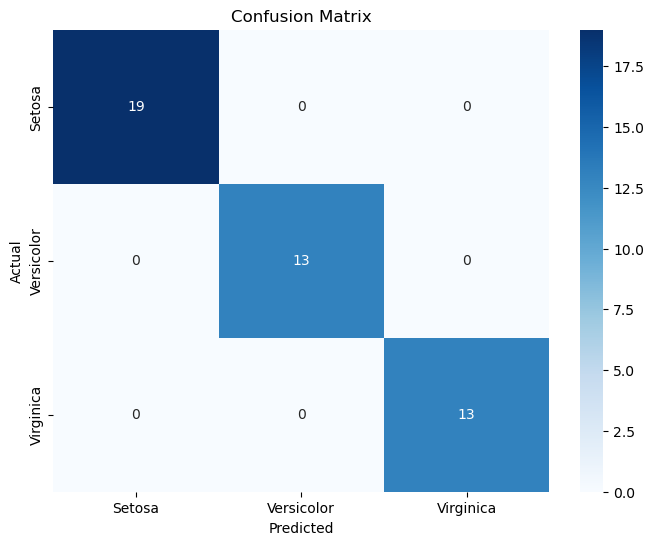


Classification report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [4]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['variety'].unique(), yticklabels=df['variety'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=df['variety'].unique()))

<Figure size 1000x600 with 0 Axes>

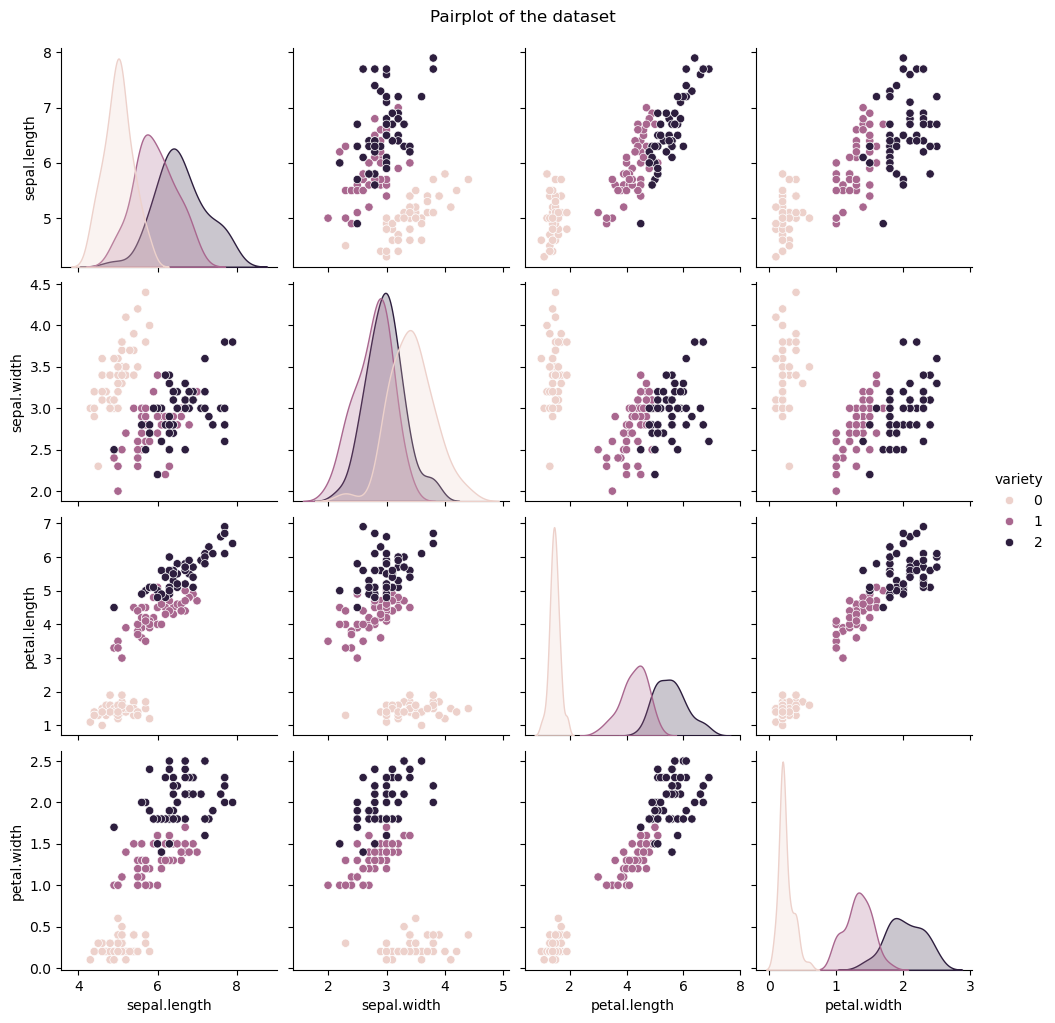

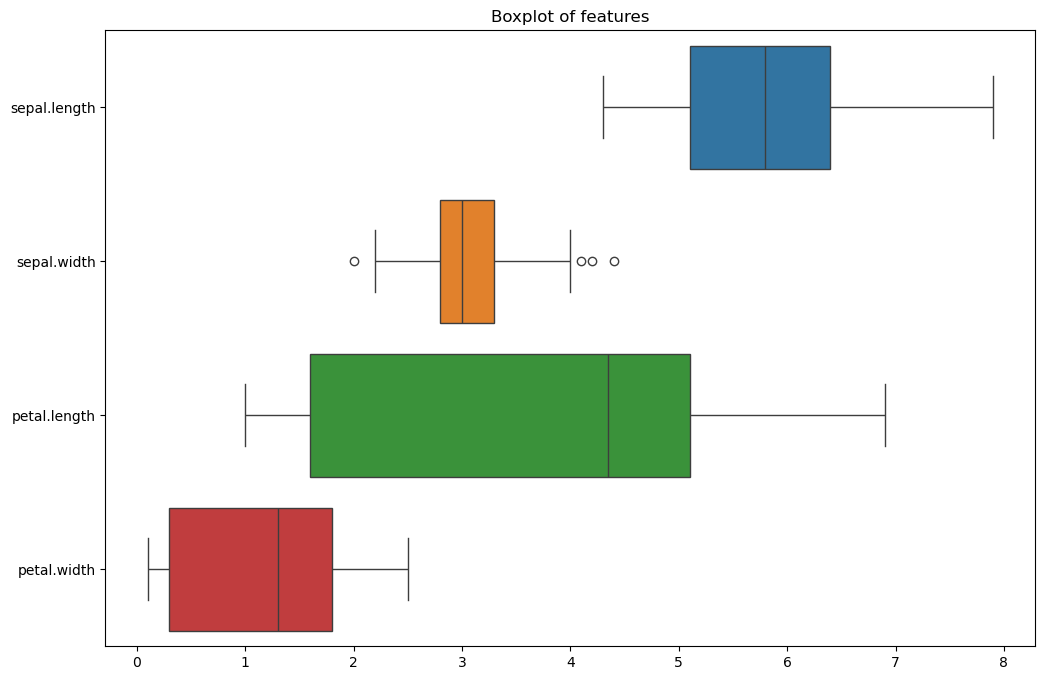

In [5]:
# Graphical representation of the dataset
plt.figure(figsize=(10, 6))
# Encode the 'variety' column into numerical values for plotting
df_encoded = df.copy()
df_encoded['variety'] = df_encoded['variety'].astype('category').cat.codes

sns.pairplot(df_encoded, hue='variety', diag_kind='kde')
plt.suptitle('Pairplot of the dataset', y=1.02)
plt.show()

# Visualize the distribution of features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop('variety', axis=1), orient='h')  # Drop 'variety' column for numerical plotting
plt.title('Boxplot of features')
plt.show()


In [6]:
#tensorflow and keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

C:\Users\madio\AppData\Local\Temp\ipykernel_11976\4075815129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='variety', data=df, palette='Set2')


Text(0.5, 0, 'Variety')

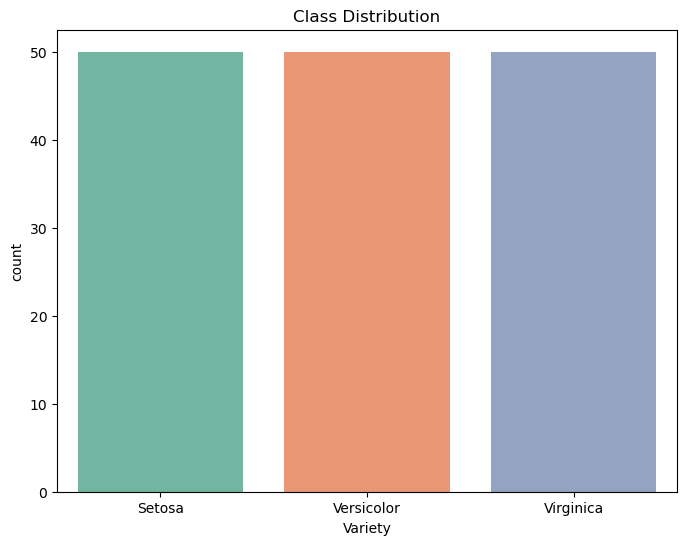

In [7]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))  
sns.countplot(x='variety', data=df, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Variety')